In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# importing linear and ensemble regressive models
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [15]:
df = pd.read_csv('analytical_base_table.csv')
df.shape

(2087, 21)

In [3]:
y = df.bmi
X = df.drop('bmi', axis=1)

In [4]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1234)

In [5]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1669 418 1669 418


In [6]:
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf':make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [7]:
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [8]:
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet': enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [9]:
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [10]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.5200024021967817
ridge 0.5200243162891064
enet 0.5203033635851171
rf 0.8756017131629209
gb 0.8293428817511963


In [11]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.49320096838776717
MAE: 4.511449475362239

ridge
--------
R^2: 0.49297071681806226
MAE: 4.511027810940516

enet
--------
R^2: 0.49394908985676056
MAE: 4.5225463807274595

rf
--------
R^2: 0.8711586537347503
MAE: 1.837996657813201

gb
--------
R^2: 0.821609686501388
MAE: 2.305257967865608



In [ ]:
# small difference between r2 score and CV score indicate good generalization

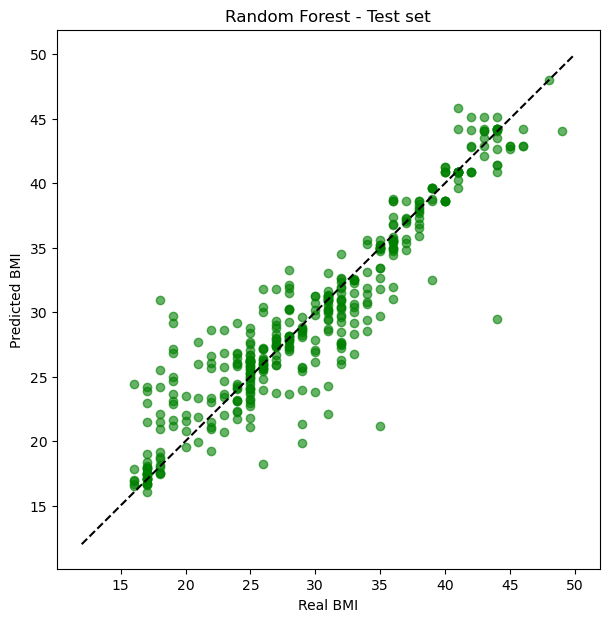

In [21]:
import matplotlib.pyplot as plt

y_test_pred  = fitted_models['rf'].predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([12,50],[12,50], 'k--') 
plt.title("Random Forest - Test set")
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")

plt.show()


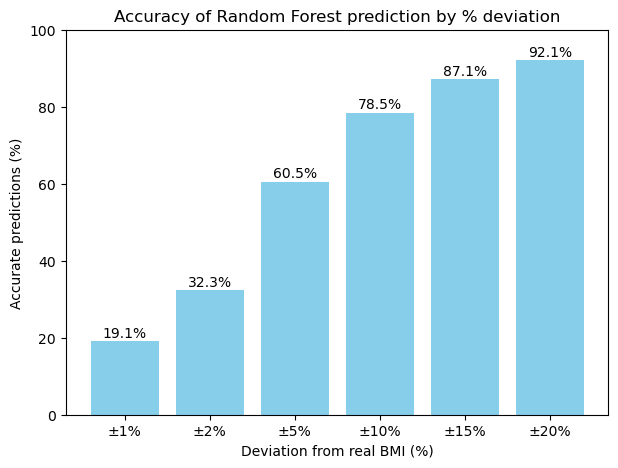

In [35]:
y_pred = fitted_models['rf'].predict(X_test)

relative_error = np.abs(y_test - y_pred) / y_test * 100  # absolutní procentní chyba

thresholds = [1, 2, 5, 10, 15, 20]  
accuracy = [(relative_error <= t).mean() * 100 for t in thresholds]

plt.figure(figsize=(7,5))
plt.bar([f"±{t}%" for t in thresholds], accuracy, color='skyblue')
plt.ylabel("Accurate predictions (%)")
plt.xlabel("Deviation from real BMI (%)")
plt.title("Accuracy of Random Forest prediction by % deviation")
plt.ylim(0,100)
for i, val in enumerate(accuracy):
    plt.text(i, val+1, f"{val:.1f}%", ha='center')
plt.show()


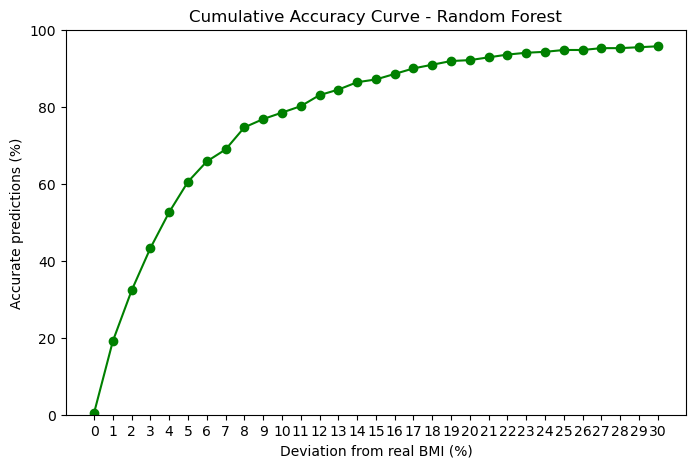

In [34]:
y_pred = fitted_models['rf'].predict(X_test)

relative_error = np.abs(y_test - y_pred) / y_test * 100

thresholds = np.arange(0, 31, 1)  # 0,1,2,...,20%
accuracy = [(relative_error <= t).mean() * 100 for t in thresholds]

plt.figure(figsize=(8,5))
plt.plot(thresholds, accuracy, marker='o', color='green')
plt.title("Cumulative Accuracy Curve - Random Forest")
plt.xlabel("Deviation from real BMI (%)")
plt.ylabel("Accurate predictions (%)")
plt.xticks(thresholds)
plt.ylim(0,100)
plt.show()
